In [1]:
# Imports and spark session init

from pyspark.rdd import RDD
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession

#Initialize a spark session.
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()
    return spark

In [2]:
spark = init_spark()

In [3]:
# Get the data
filename = "../data/application_train.csv"
data = spark.read.csv(filename, header=True)

In [5]:
rows = data.count()

In [6]:
columns = len(data.columns)

In [7]:
print(rows, "rows,",  columns, "columns")

307511 rows, 122 columns


In [8]:
print(data.columns[:8])



['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL']


In [9]:
df = data.select("TARGET")
not_repaid = df.where(data["TARGET"] == 1).count() 
repaid = df.where(data["TARGET"] == 0).count() 

print(repaid, "repaid,", not_repaid, "not repaid")

percent_repaid = round(repaid/(repaid+not_repaid)*100,2)
print(f'{percent_repaid}% of loans are repaid')

282686 repaid, 24825 not repaid
91.93% of loans are repaid


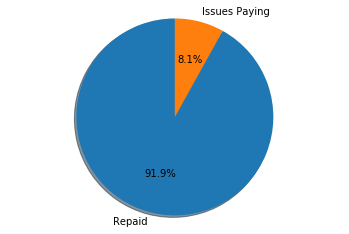

In [13]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie([repaid/(repaid+not_repaid),not_repaid/(repaid+not_repaid)], labels=['Repaid','Issues Paying'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [24]:
filename = "../data/bureau.csv"
data = spark.read.csv(filename, header=True)

In [27]:
data = data.select("SK_ID_CURR", "SK_ID_BUREAU", "CREDIT_CURRENCY")
data.rdd.map(lambda row: 1).reduce(lambda x,y: x+y)

1716428